## Computing neighbouring contribution function 

In [1]:
# 1D case 
# params = x
# xgrid: xv 

In [1]:
import jax.numpy as jnp
import numpy as np
from jax import jit
from jax import vmap

In [2]:
@jit
def conti(i,x,xv):
    """contribution function for index i.  
    
    Args:
        i: index 
        x: x value
        xv: x grid
            
    Returns:
        contribution for i
        
    """
    indarr=jnp.arange(len(xv))
    pos = jnp.interp(x,xv,indarr)
    index = (pos).astype(int)
    cont = pos-index
    f=jnp.where(index==i,1.0-cont,0.0)
    g=jnp.where(index+1==i,cont,0.0)
    return f+g

In [3]:
def nc1D(x,xv):
    """neighbouring contribution array on a line.
    
    Args:
        x: x value
        xv: x grid
            
    Returns:
        neighbouring contribution for i
        
    """
    indarr=jnp.arange(len(xv))
    vcl=vmap(conti,(0,None,None),0)
    return vcl(indarr,x,xv)

In [4]:
xv=jnp.linspace(0,1,11) #grid
print(nc1D(0.23,xv))

[0.         0.         0.70000005 0.29999995 0.         0.
 0.         0.         0.         0.         0.        ]


In [17]:
from jax import grad

In [20]:
def gnc1D(x,xv):
    """gradiend of neighbouring contribution array on a line by x.
    
    Args:
        x: x value
        xv: x grid
            
    Returns:
        neighbouring contribution for i
        
    """
    indarr=jnp.arange(len(xv))
    vcl=vmap(grad(conti,argnums=1),(0,None,None),0)
    return vcl(indarr,x,xv)

In [21]:
print(gnc1D(0.23,xv))

[ 0.        0.       -9.999999  9.999999  0.        0.        0.
  0.        0.        0.        0.      ]


In [22]:
xv=jnp.linspace(0,1,11) #grid
a=[]
ga=[]
for i,x in enumerate(jnp.linspace(0,1,101)):
    a.append(nc1D(x,xv))
    ga.append(gnc1D(x,xv))

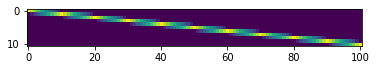

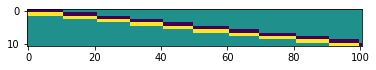

In [23]:
import matplotlib.pyplot as plt
plt.imshow(jnp.array(a).T)
plt.show()
plt.imshow(jnp.array(ga).T)
plt.show()

In [7]:
#2D case
# x, y

In [12]:
def nc2D(x,y,xv,yv):
    """2D neighbouring contribution.
    
    Args:
        x: x value
        y: x value
        xv: x grid
        yv: x grid
            
    Returns:
        neighbouring contribution 
        
    """
    indarrx=jnp.arange(len(xv))
    indarry=jnp.arange(len(yv))
    vcl=vmap(conti,(0,None,None),0)
    fx=vcl(indarrx,x,xv)
    fy=vcl(indarry,y,yv)
    return fx[:,None]*fy[None,:]

In [13]:
xv=jnp.linspace(0,1,11) #grid
yv=jnp.linspace(0,1,11) #grid

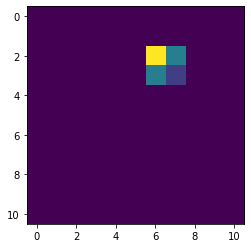

In [14]:
plt.imshow(nc2D(0.23,0.63,xv,yv))